# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b3482f8df8b645bd81d527c106c7c007 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IFajjGfHefn_pW7C0hn1VbtMMLqou9HcSn_DVgL9RO_F',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b3482f8df8b645bd81d527c106c7c007.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-y2lowwhgqvyo32',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)


df.replace(to_replace=['Developing', 'Developed'],
           value= [0, 1], 
           inplace=True)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
LifeData=df.drop('Year',axis=1)  

# Analysing Data


In [4]:
(LifeData.describe())
LifeData.columns


# ##renaming the before spaced name column
LifeData.rename(columns={' thinness  1-19 years':'thinness  1-19 years',
                     ' thinness 5-9 years':'thinness 5-9 years',
                     ' HIV/AIDS':'HIV/AIDS',
                      ' BMI ':'BMI'},inplace=True)

LifeData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null object
Status                             2938 non-null int64
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2490 non-nul

# Visualizing Data

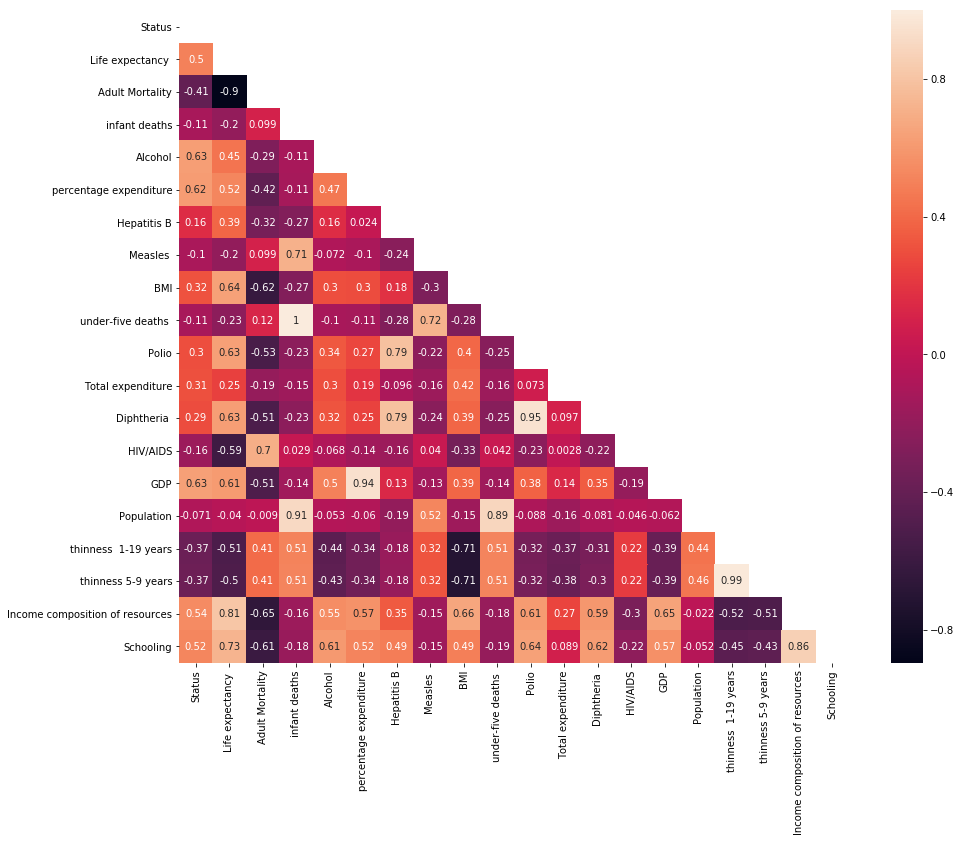

In [20]:
plt.figure(figsize = (15, 12))
matrix = np.triu(LifeData.corr())
sns.heatmap(LifeData.corr(), annot=True, mask=matrix)

# Changing categorical Column

In [6]:
LifeData = LifeData.groupby('Country').mean()
LifeData.head(20)

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,0.0,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,0.0,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,0.0,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,0.0,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375
Argentina,0.0,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.3750,6.912667,92.3750,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.50625
Armenia,0.0,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.1250,4.861333,87.3750,0.10000,1999.986318,1.015165e+06,2.03750,2.11250,0.698375,11.78750
Australia,1.0,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.7500,8.836667,86.8750,0.10000,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750
Austria,1.0,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.0000,4.715333,86.7500,0.10000,33827.476309,6.474880e+06,1.73125,1.93750,0.862375,15.38750


# Making X & Y

In [7]:
LifeLabels = LifeData['Life expectancy ']
LifeFeatures = LifeData.drop('Life expectancy ', axis = 1)

# FILL MISSING VALUES

In [8]:
print(LifeFeatures.isnull().sum())
print(LifeLabels.isnull().sum())
LifeFeatures.fillna(value = LifeFeatures.mean(), inplace = True)
LifeLabels.fillna(value = LifeLabels.mean(), inplace = True)
print('--------------------------------------------------------')
print(LifeFeatures.isnull().sum())
print(LifeLabels.isnull().sum())


Status                              0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
BMI                                 4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                30
Population                         48
thinness  1-19 years                4
thinness 5-9 years                  4
Income composition of resources    17
Schooling                          13
dtype: int64
10
--------------------------------------------------------
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B         

# Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
LifeFeatures = min_max_scaler.fit_transform(LifeFeatures)


LifeFeatures



array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        5.56004489e-01, 3.54720225e-01, 4.09856519e-01],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        5.74635241e-02, 7.22960300e-01, 6.05739239e-01],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        2.10998878e-01, 7.04204439e-01, 6.34435434e-01],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.90235690e-01, 4.29899969e-01, 4.24516532e-01],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        2.39281706e-01, 4.58580807e-01, 5.59575795e-01],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        2.47362514e-01, 3.84417005e-01, 4.90330630e-01]])

# Spliting into testing and training data



In [10]:
from sklearn.model_selection import train_test_split
LifeFeatures_train, LifeFeatures_test, LifeLabels_train, LifeLabels_test = train_test_split(
        LifeFeatures, LifeLabels, train_size = 0.7, test_size = 0.3)

# Model Training


In [11]:
from sklearn.ensemble import RandomForestRegressor
p=RandomForestRegressor(n_estimators=40,random_state=50)

p.fit(LifeFeatures_train,LifeLabels_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

# Errors


In [12]:
from sklearn import metrics

predictions = p.predict(LifeFeatures_test)
print('MAE',metrics.mean_absolute_error(LifeLabels_test,predictions))
print('MSE',metrics.mean_squared_error(LifeLabels_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(LifeLabels_test,predictions)))

MAE 1.8649918886612031
MSE 5.474815527594329
RMSE 2.3398323716869824


# Accuracy

In [13]:
metrics.explained_variance_score(LifeLabels_test,predictions)*100

91.4422203779417

In [14]:
df=pd.DataFrame({'Actual':LifeLabels_test, 'Predicted':predictions})
print(df.head(25))

                                       Actual  Predicted
Country                                                 
Barbados                            74.356250  76.607031
Trinidad and Tobago                 71.068750  71.719214
Mauritania                          62.800000  63.294059
Cook Islands                        69.224932  69.651511
Israel                              81.300000  81.422969
Cambodia                            64.343750  61.343750
Azerbaijan                          70.731250  72.424688
Jordan                              72.987500  74.607031
Monaco                              69.224932  69.358082
El Salvador                         71.743750  72.842969
South Africa                        57.500000  53.728750
New Zealand                         81.337500  80.923281
Lesotho                             48.781250  53.580156
Malta                               80.362500  78.524062
Costa Rica                          78.593750  76.595156
Netherlands                    

# Testing with custom inputs

In [15]:
x=pd.DataFrame({'Status':[0],'Adult Mortality':[263], 'infant deaths':[62], 'Alcohol':[0.01],
       'percentage expenditure':[71.27962362], 'Hepatitis B':[65], 'Measles ':[1154], 'BMI ':[19.1],
       'under-five deaths ':[83], 'Polio':[6], 'Total expenditure':[8.16], 'Diphtheria ':[65],
       'HIV/AIDS':[0.1], 'GDP':[584.25921], 'Population':[33736494], 'thinness  1-19 years':[17.2],
       'thinness 5-9 years':[17.3], 'Income composition of resources':[0.479], 'Schooling':[10.1],})
prediction=p.predict(x)
print(prediction)

[54.77859375]


# Creation of end-point



In [16]:
!pip install watson-machine-learning-client

In [17]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-11 10:58:05,682 - watson_machine_learning_client.wml_client_error - WARNING - apikey value cannot be ''. Either pass a valid apikey for IAM token or go with ML token.
2020-06-11 11:52:13,716 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-11 11:52:23,900 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"41f79a72125c263e9ebe5c4a3bfc5a2b","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [21]:
wml_credentials={
  "apikey": "",
  "instance_id": "",
  "url": ""
}

In [22]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [23]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "MOBBASHER", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "@gmail.com", 
               client.repository.ModelMetaNames.NAME: "lifeExpectancy"}

In [24]:
model_artifact =client.repository.store_model(p, meta_props=model_props)

In [25]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [26]:
published_model_uid

'03b437a0-4b7f-454b-bbfe-036be61dabe1'

In [31]:
deployment = client.deployments.create(published_model_uid, name="lifeExpectancy")




#######################################################################################

Synchronous deployment creation for uid: '03b437a0-4b7f-454b-bbfe-036be61dabe1' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dbd1f458-156e-44fa-83c0-8f4aad339333'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [ ]:
scoring_endpoint

In [35]:
# client.deployments.list()
# client.deployments.delete('bf6fa95f-0d3b-41ee-9c72-0c16c18650de')